# Генетические алгоритмы
## Алгоритм дифференциальной эволюции
2. Инициализация:
   - Создать начальную популяцию ${x_i}, i = 1, 2, ..., N.$
2. Повторять до достижения критерия остановки:
   a. Для каждого индивида x_i:
      i. Выбрать три уникальных индивида a, b, c из популяции, $a ≠ b ≠ c ≠ i.$
      ii. Вычислить мутационный вектор $v_i: v_i = x_a + F * (x_b - x_c)$, где F - коэффициент мутации.
      iii. Для каждой компоненты j вектора параметров:
          - $Если  rand_j ≤ CR или j = j_{rand}, то u_{ij} = v_{ij}.$
          - $Иначе, u_{ij} = x_{ij}.$
   b. Вычислить значение целевой функции для каждого индивида u_i.
   c. Если значение целевой функции для u_i лучше, чем для x_i, заменить x_i на u_i в следующем поколении.
3. Вывод: Вернуть лучший найденный индивид.


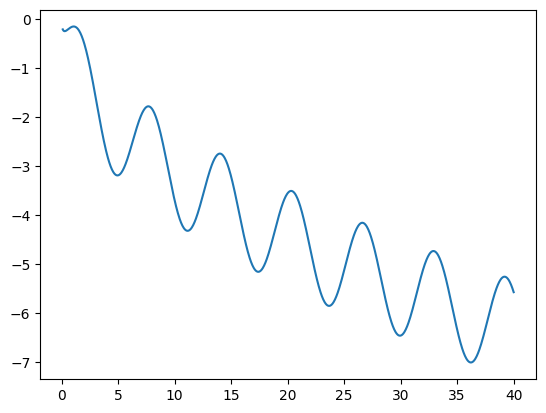

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from random import random
from random import sample
from random import uniform

f = lambda x: np.sin(x) - np.sqrt(x)
interval = [0.1, 40]

X = np.linspace(interval[0], interval[1], 1000)

plt.plot(X, f(X))
plt.show()

In [9]:
def ensure_bounds(vec, bounds):

    vec_new = []
    # cycle through each variable in vector 
    for i in range(len(vec)):

        # variable exceedes the minimum boundary
        if vec[i] < bounds[i][0]:
            vec_new.append(bounds[i][0])

        # variable exceedes the maximum boundary
        if vec[i] > bounds[i][1]:
            vec_new.append(bounds[i][1])

        # the variable is fine
        if bounds[i][0] <= vec[i] <= bounds[i][1]:
            vec_new.append(vec[i])
        
    return vec_new

In [29]:
def minimize(cost_func, bounds, popsize, mutate, recombination, maxiter):
    path=[]
    population = []
    for i in range(0,popsize):
        indv = []
        for j in range(len(bounds)):
            indv.append(uniform(bounds[j][0],bounds[j][1]))
        population.append(indv)
    last_gen_avg=-100000
    for i in range(1,maxiter+1):
        print ("Поколение:",i)
        #print(population)
        gen_scores = [] 
        for j in range(0, popsize):
            
            candidates = list(range(0,popsize))
            candidates.remove(j)
            random_index = sample(candidates, 3)

            x_1 = population[random_index[0]]
            x_2 = population[random_index[1]]
            x_3 = population[random_index[2]]
            x_t = population[j] 

            x_diff = [x_2_i - x_3_i for x_2_i, x_3_i in zip(x_2, x_3)]

            v_donor = [x_1_i + mutate * x_diff_i for x_1_i, x_diff_i in zip(x_1, x_diff)]
            v_donor = ensure_bounds(v_donor, bounds)

            v_trial = []
            for k in range(len(x_t)):
                crossover = random()
                if crossover <= recombination:
                    v_trial.append(v_donor[k])

                else:
                    v_trial.append(x_t[k])

            score_trial  = cost_func(v_trial)
            score_target = cost_func(x_t)

            if score_trial < score_target:
                population[j] = v_trial
                gen_scores.append(score_trial)
                # print( 'f(x), [x] = ',score_trial, v_trial)

            else:
                # print( 'f(x), [x] = ',score_target, x_t)
                gen_scores.append(score_target)
               
        gen_avg = sum(gen_scores) / popsize                        
        gen_best = min(gen_scores)                                 
        gen_sol = population[gen_scores.index(min(gen_scores))] 
        path.append([gen_best,gen_sol])
        print()
        # print ('   > Лучшее решение:',gen_sol,'\n')
        
        if abs(gen_avg-last_gen_avg)<0.000001:
            return path
        last_gen_avg=gen_avg
    return path

In [11]:
bounds = [interval]            # bounds [(x1_min, x1_max), (x2_min, x2_max),...]
popsize = 30                        # population size, must be >= 4
mutate = 0.2                      # mutation factor [0,2]
recombination = 0.73                # recombination rate [0,1]
maxiter = 20    
cost_func=lambda x: sum(f(el) for el in x)

In [30]:
# %%time
t=time.time()
results=minimize(cost_func , bounds, popsize, mutate, recombination, maxiter)
gen_time=time.time()-t
f"exec time: {gen_time}"

Поколение: 1

Поколение: 2

Поколение: 3

Поколение: 4

Поколение: 5

Поколение: 6

Поколение: 7

Поколение: 8

Поколение: 9

Поколение: 10

Поколение: 11

Поколение: 12

Поколение: 13

Поколение: 14

Поколение: 15

Поколение: 16

Поколение: 17

Поколение: 18


'exec time: 0.0056819915771484375'

In [20]:
def draw_plot(array):
    global f, interval, X
    f = lambda x: np.sin(x) - np.sqrt(x)
    interval = [0.1, 40]
    X = np.linspace(interval[0], interval[1], 1000)
    plt.plot(X, f(X))
    for i in range(len(array)):
        el = array[i]
        plt.scatter(el[1][0], el[0])
    plt.title(f'Iteration {i}')
    plt.xlabel('$x$')
    plt.ylabel('f(x)')
    plt.legend()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


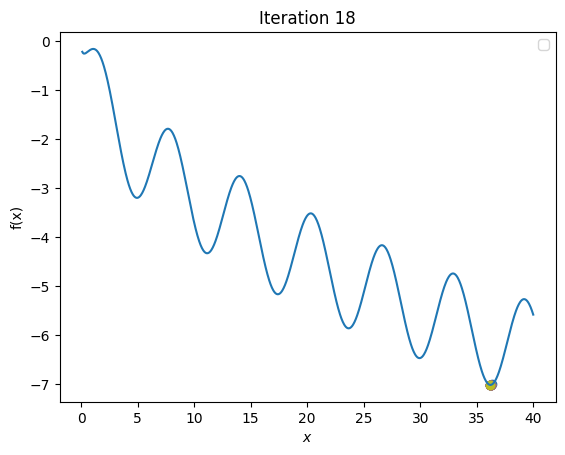

In [26]:
draw_plot(results)

| Алгоритм                | Время работы | Итерации | Значение  |
|-------------------------|--------------|----------|-----------|
| Генетический            | 0.006        | 13       | 36.211    |
| Пиявский                | 0.0005       | 60       | 36.2057   |
